In [1]:
import numpy as np
import matplotlib.pyplot as plt

def update_multiplier(nb_gen):    
    multipliers = 1
    if nb_gen >= 25:
        multipliers *=2
    if nb_gen >= 50:
        multipliers *=2
    if nb_gen >= 100:
        multipliers *=2
    if nb_gen >= 200:
        multipliers *=2
    if nb_gen >= 400:
        multipliers *=2
    return multipliers

def cost_of_generator(init_cost,cost_coef,nb_gen):
    return init_cost * (cost_coef ** nb_gen)

def production_gen(init_productivity, nb_gen, multipliers):
    return init_productivity * nb_gen * multipliers

def acheter_generateur(capital, generator_key):
    generator = data_generator[generator_key]
    while capital >= cost_of_generator(generator["init_cost"], generator["cost_coef"], generator["nb"]):
        capital -= cost_of_generator(generator["init_cost"], generator["cost_coef"], generator["nb"])
        generator["nb"] += 1  # Acheter un générateur
        generator["multiplier"] = update_multiplier(generator["nb"])  # Mettre à jour le multiplicateur
    return capital, cost_of_generator(generator["init_cost"], generator["cost_coef"], generator["nb"])

# Initialisation des variables
capital = 0  
time = 0 
time_step = 1 
simulation_time = 200 #seconde

data_generator = {
    "gen_1": {"nb": 1, "init_cost": 3.738, "cost_coef": 1.07, "init_productivity": 1.67, "multiplier": 1},
    "gen_2": {"nb": 0, "init_cost": 60, "cost_coef": 1.15, "init_productivity": 20, "multiplier": 1}
}

data_affichage = {
    "gen_1": {"nb": [], "cost": [], "production": []},
    "gen_2": {"nb": [], "cost": [], "production": []},
}

capitals = []
times = []  
productions = []
costs = []

# Simulation du jeu
while time < simulation_time: 

    # Calcul de la production à chaque instant
    production_gen_1 = production_gen(data_generator["gen_1"]["init_productivity"], data_generator["gen_1"]["nb"], data_generator["gen_1"]["multiplier"])
    production_gen_2 = production_gen(data_generator["gen_2"]["init_productivity"], data_generator["gen_2"]["nb"], data_generator["gen_2"]["multiplier"])
    production = production_gen_1 + production_gen_2   

    # Accumuler la production au capital
    capital += production * time_step

    # Acheter générateur si le capital est suffisant
    capital, cost_gen_2 = acheter_generateur(capital, "gen_2")
    capital ,cost_gen_1 = acheter_generateur(capital, "gen_1")
    cost = cost_gen_1 + cost_gen_2

    # Enregistrer les valeurs pour afficher les courbes
    time += time_step
    times.append(time/60)

    productions.append(production)
    capitals.append(capital)
    costs.append(cost)


    data_affichage["gen_1"]["nb"].append(data_generator["gen_1"]["nb"])
    data_affichage["gen_2"]["nb"].append(data_generator["gen_2"]["nb"])

    data_affichage["gen_1"]["cost"].append(cost_of_generator(data_generator["gen_1"]["init_cost"], data_generator["gen_1"]["cost_coef"], data_generator["gen_1"]["nb"]))
    data_affichage["gen_2"]["cost"].append(cost_of_generator(data_generator["gen_2"]["init_cost"], data_generator["gen_2"]["cost_coef"], data_generator["gen_2"]["nb"]))

    data_affichage["gen_1"]["production"].append(production_gen_1)
    data_affichage["gen_2"]["production"].append(production_gen_2)

print(data_generator)

{'gen_1': {'nb': 126, 'init_cost': 3.738, 'cost_coef': 1.07, 'init_productivity': 1.67, 'multiplier': 8}, 'gen_2': {'nb': 42, 'init_cost': 60, 'cost_coef': 1.15, 'init_productivity': 20, 'multiplier': 2}}


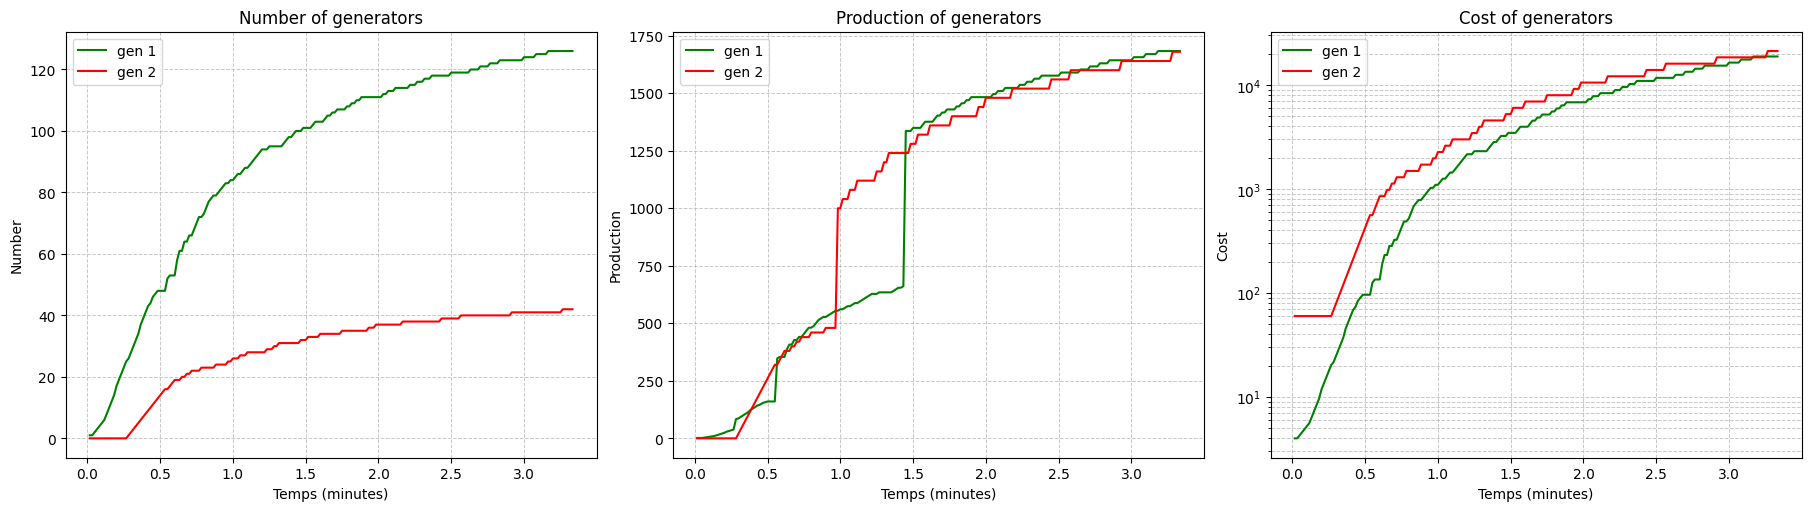

In [2]:

# Création de l'image avec 3 graphiques alignés horizontalement
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Graphique 1 : Nombre de générateurs
axs[0].plot(times, data_affichage["gen_1"]["nb"], label="gen 1", color="green")
axs[0].plot(times, data_affichage["gen_2"]["nb"], label="gen 2", color="red")
axs[0].set_xlabel("Temps (minutes)")
axs[0].set_ylabel("Number")
# axs[0].set_yscale("log") 
axs[0].set_title("Number of generators")
axs[0].legend()
axs[0].grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Graphique 2 : Production des générateurs
axs[1].plot(times, data_affichage["gen_1"]["production"], label="gen 1", color="green")
axs[1].plot(times, data_affichage["gen_2"]["production"], label="gen 2", color="red")
axs[1].set_xlabel("Temps (minutes)")
axs[1].set_ylabel("Production")
# axs[1].set_yscale("log") 
axs[1].set_title("Production of generators")
axs[1].legend()
axs[1].grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Graphique 3 : Coût des générateurs
axs[2].plot(times, data_affichage["gen_1"]["cost"], label="gen 1", color="green")
axs[2].plot(times, data_affichage["gen_2"]["cost"], label="gen 2", color="red")
axs[2].set_xlabel("Temps (minutes)")
axs[2].set_ylabel("Cost")
axs[2].set_yscale("log") 
axs[2].set_title("Cost of generators")
axs[2].legend()
axs[2].grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Affichage de l'image
plt.show()

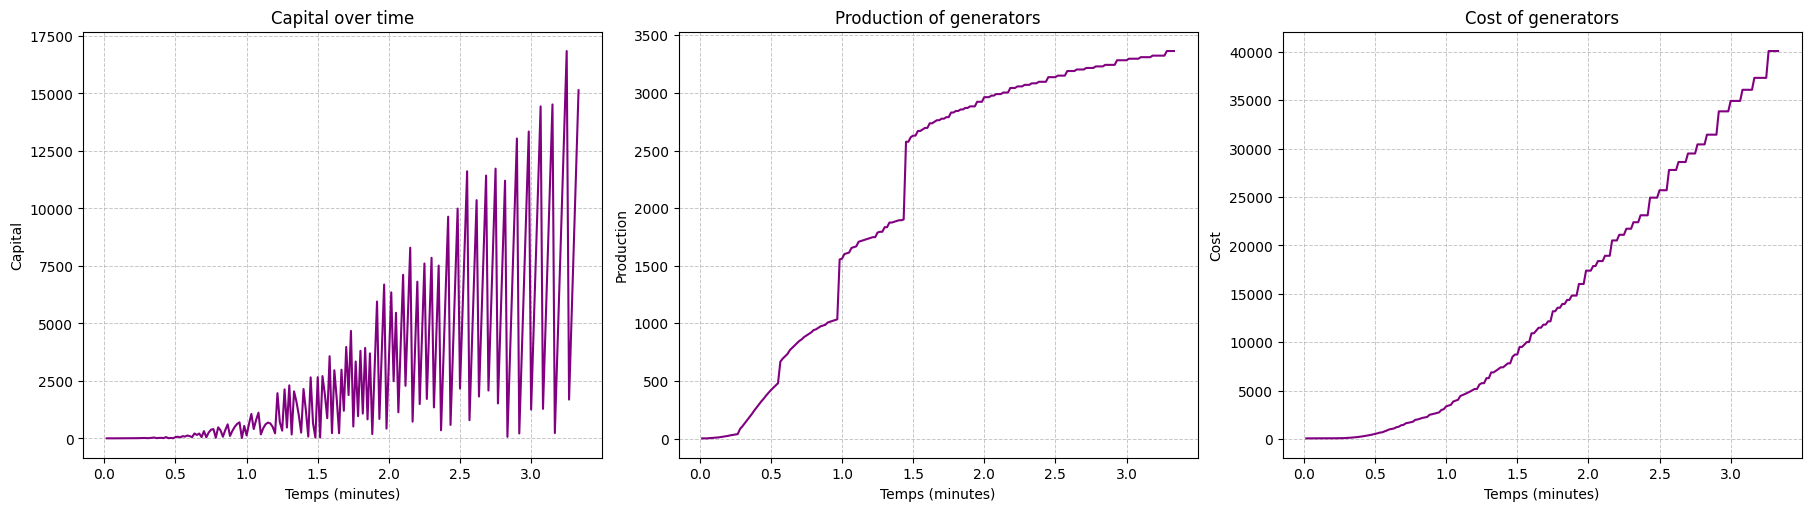

In [3]:

# Création de l'image avec 3 graphiques alignés horizontalement
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Graphique 1 : Nombre de générateurs (capital ici pour simplifier)
axs[0].plot(times, capitals, color="purple")
axs[0].set_xlabel("Temps (minutes)")
axs[0].set_ylabel("Capital")
axs[0].set_title("Capital over time")
axs[0].grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Graphique 2 : Production des générateurs
axs[1].plot(times, productions,color="purple")
axs[1].set_xlabel("Temps (minutes)")
axs[1].set_ylabel("Production")
axs[1].set_title("Production of generators")
axs[1].grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Graphique 3 : Coût des générateurs
axs[2].plot(times, costs, color="purple")
axs[2].set_xlabel("Temps (minutes)")
axs[2].set_ylabel("Cost")
axs[2].set_title("Cost of generators")
axs[2].grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Affichage de l'image
plt.show()